In [22]:
from herbie import Herbie
from toolbox import EasyMap, pc
from paint import cm_reflectivity

import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [100]:
H = Herbie("2023-04-19 21:00", model='hrrr', product='sfc', fxx=1, member=1)
#H.download()
ds = H.xarray("REFD:1000 m above ground")

✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Apr-19 21:00 UTC F01 ┊ GRIB2 @ aws ┊ IDX @ aws


Text(1.0, 1.0, 'Derived radar reflectivity')

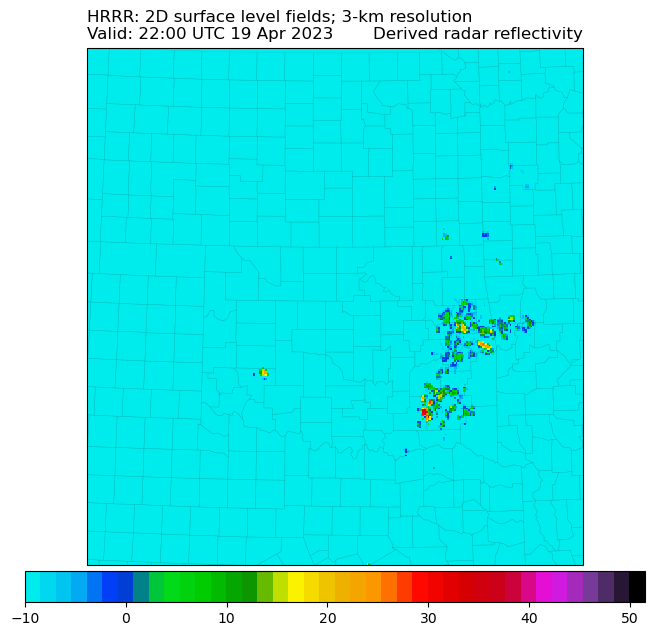

In [101]:
ax = EasyMap("50m", crs=ds.herbie.crs, figsize=[10, 8]).COUNTIES().ax

ax.set_extent([-102, -93, 32, 40])

p = ax.pcolormesh(
    ds.longitude,
    ds.latitude,
    ds.refd,
    transform=pc,
    cmap=cm_reflectivity().cmap,
)
plt.colorbar(
    p,
    ax=ax,
    orientation="horizontal",
    pad=0.01,
    shrink=0.8,
)

ax.set_title(
    f"{ds.model.upper()}: {H.product_description}\nValid: {ds.valid_time.dt.strftime('%H:%M UTC %d %b %Y').item()}",
    loc="left",
)
ax.set_title(ds.refd.GRIB_name, loc="right")